### <center>**Entraînement des modèles de clustering avec K-Means**</center>

#### **1. Déterminer la Valeur Optimale de k :**

``K-Means`` a besoin d’un paramètre important avant de commencer : **le nombre de clusters ``K`` à créer**.

Mais on ne sait pas toujours combien de groupes notre dataset contient vraiment.

- Si ``K`` est trop petit : les groupes sont mal séparés (on mélange des points qui ne devraient pas être ensemble).

- Si ``K`` est trop grand : on divise trop, on obtient des petits clusters inutiles.

Il faut donc trouver un équilibre entre :

- un regroupement simple (peu de clusters)

- Un regroupement efficace (chaque cluster bien homogène).

C’est exactement ce que la méthode du coude permet de faire.

##### **1.1. Méthode de coude (Elbow Method):**

Le principe repose sur une mesure appelée inertie (aussi appelée Within-Cluster Sum of Squares — WCSS).

L’inertie mesure la qualité du regroupement :

c’est la somme des distances au carré entre chaque point et le centroïde de son cluster.

Formule :

$$
Inertie = \sum_{k=1}^{k} \sum_{x_i \in C_k} ||x_i - \mu_k||²
$$

où

- $C_k$ = le kᵉ cluster,

- $\mu_k$= son centroïde,

- $x_i$ = les points appartenant à ce cluster.

Plus l’inertie est petite, plus les points sont proches de leur centroïde, donc mieux regroupés.

**L'inertie :**

- Quand on augmente ``K``, les clusters deviennent plus petits càd les points sont plus proches de leur centroïde, donc l’inertie diminue.

- Mais cette diminution n’est pas toujours significative :

    - Au début, chaque nouveau cluster améliore beaucoup la qualité.

    - Ensuite, les améliorations deviennent de moins en moins importantes.

    - À un moment, la courbe change de pente. **C’est le point du coude**.

le ``K`` pour lequel ajouter plus de clusters n’apporte plus d’amélioration significative.

1 clusters = 1749.8747468287904
2 clusters = 1111.3718290601523
3 clusters = 891.3085059814854
4 clusters = 728.035338773223
5 clusters = 648.3288308441358
6 clusters = 595.9079822627555
7 clusters = 551.4473406506637
8 clusters = 516.0271894702464
9 clusters = 491.35008715494797
10 clusters = 470.9693422319919


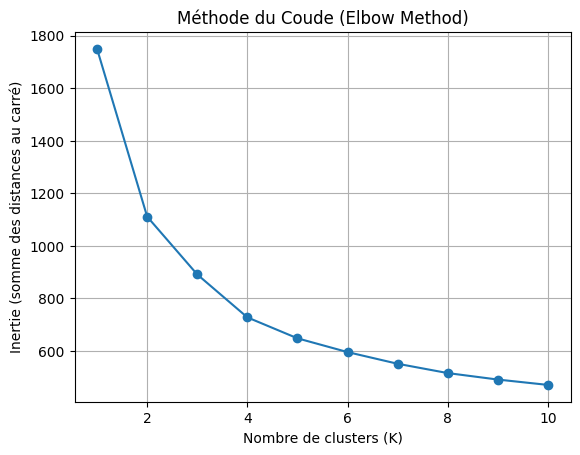

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = pd.read_csv("../data/processed/cleaned_data.csv")

inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)
    print(f"{k} clusters = {kmeans.inertia_}")

plt.plot(K_range, inertias, marker='o')
plt.title('Méthode du Coude (Elbow Method)')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Inertie (somme des distances au carré)')
plt.grid(True)
plt.show()

- De ``K=1`` à ``K=2``, la baisse est très forte et l'inertie diminue d’environ 638 unités.

- De ``K=2`` à ``K=3``, la baisse reste importante (=220).

- De ``K=3`` à ``K=4``, la baisse est encore notable (=163).

- À partir de ``K=4``, les diminutions deviennent plus faibles (=70, 50, 40…).

Le point de coude se situe donc autour de **``K = 4``**.

<br>

##### **1.2. Méthode du Coefficient de Silhouette (Silhouette Method) :**

La méthode du coefficient de silhouette mesure la qualité du regroupement des données, c’est-à-dire à quel point chaque point est bien classé dans son cluster.

Pour chaque point $i$:

- on calcule à quel point il est proche de son propre cluster (cohésion),

- et à quel point il est éloigné des autres clusters (séparation).

Ensuite, on combine ces deux valeurs dans une formule.

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

où :

- $a(i)$ = la distance moyenne entre le point $i$ et les autres points du même cluster pour mesure de cohésion interne.

- $b(i)$ = la distance moyenne minimale entre le point $i$ et les points du cluster le plus proche pour mesure de séparation inter-clusters.

**Interprétation du score :**

Le score silhouette $s(i)$ varie entre -1 et 1 :

| Score silhouette | Interprétation                                                   |
| ---------------- | ---------------------------------------------------------------- |
| **≈ 1**          | Le point est bien classé, loin des autres clusters.              |
| **≈ 0**          | Le point est à la frontière entre deux clusters.                 |
| **< 0**          | Le point est mal classé (il serait mieux dans un autre cluster). |

Pour l’ensemble des données, on calcule la moyenne de tous les $s(i)$ càd le score moyen de silhouette.


K = 2 --> Score de silhouette = 0.317
K = 3 --> Score de silhouette = 0.263
K = 4 --> Score de silhouette = 0.257
K = 5 --> Score de silhouette = 0.223
K = 6 --> Score de silhouette = 0.213
K = 7 --> Score de silhouette = 0.200
K = 8 --> Score de silhouette = 0.189
K = 9 --> Score de silhouette = 0.184
K = 10 --> Score de silhouette = 0.193


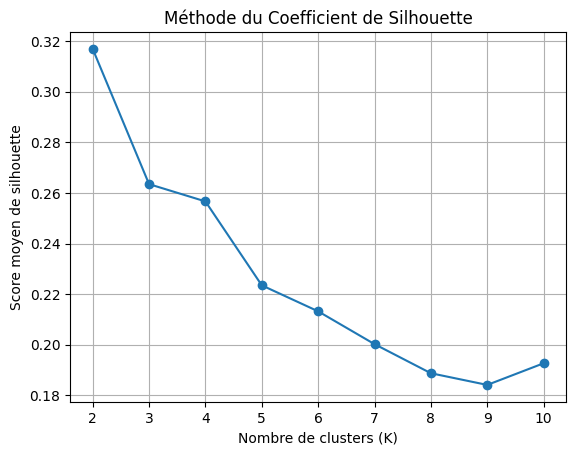

In [2]:
from sklearn.metrics import silhouette_score


silhouette_scores = []
K_values = range(2, 11) 

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"K = {k} --> Score de silhouette = {score:.3f}")

plt.plot(K_values, silhouette_scores, marker='o')
plt.title("Méthode du Coefficient de Silhouette")
plt.xlabel("Nombre de clusters (K)")
plt.ylabel("Score moyen de silhouette")
plt.grid(True)
plt.show()

**Analyse :**

1. ``K = 2`` --> ``Score = 0.317`` :

    - C’est le meilleur score.

    - Cela signifie que, quand on divise les données en 2 clusters, la séparation entre les groupes est la plus nette.

    - Les clusters sont bien distincts et peu mélangés.

2. ``K = 3`` et ``K = 4`` :

    - Le score baisse (= 0.26), ce qui indique que les clusters commencent à se rapprocher les uns des autres.

    - L’ajout d’un cluster supplémentaire n’améliore pas la qualité du regroupement.

3. À partir de ``K = 5`` jusqu’à ``10`` :

    - Le score diminue progressivement jusqu’à = 0.18.

    - Les clusters deviennent trop nombreux, donc trop petits et moins bien séparés.

    - Cela indique un sur-clustering (on divise trop les données).

<br>

Le nombre optimal de clusters selon la méthode du coefficient de silhouette est **``K = 2``**.

<br>

#### **2. Entraînement du Modèle KMeans :**

In [3]:
import numpy as np

k_optimal = 2

kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(data)

clusters = kmeans.labels_

print(np.unique(clusters))

[0 1]


#### **3. Ajout de la Colonne Cluster au Dataset :**

In [4]:
data["Cluster"] = clusters

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Cluster
0,1.945910,0.863078,4.290459,3.583519,5.347108,3.543854,0.486738,3.931826,0
1,0.693147,-1.206933,4.204693,3.401197,4.304065,3.317816,0.300845,3.465736,1
2,2.197225,2.013084,4.174387,3.414443,5.951163,3.190476,0.514021,3.496508,0
3,0.693147,-1.075504,4.204693,3.178054,4.553877,3.370738,0.154436,3.091042,1
4,0.000000,0.501647,3.713572,3.583519,5.129899,3.786460,1.190279,3.526361,0


#### **4. Visualisation des Clusters :**

##### **4.1. Réduction des Dimensions PCA - 2D :**

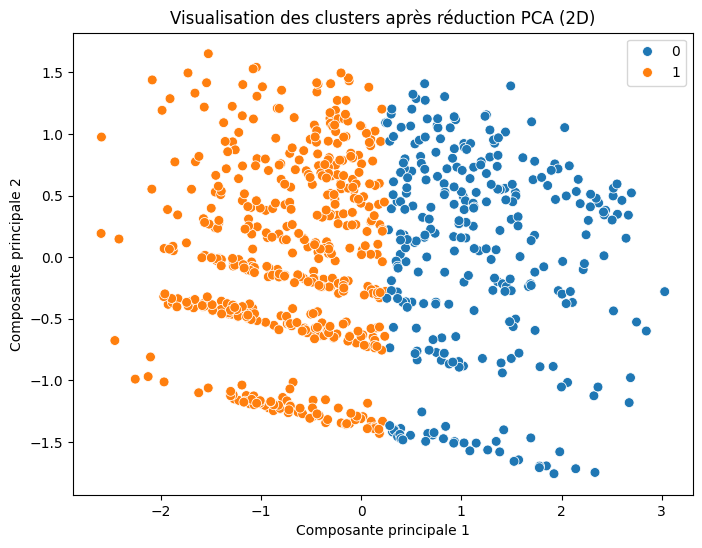

In [5]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data.drop("Cluster", axis=1))

plt.figure(figsize=(8,6))
sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1], hue=clusters, palette='tab10', s=50)
plt.title("Visualisation des clusters après réduction PCA (2D)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.show()

##### **4.2. Nombre d’observations par cluster - Bar Chart :**

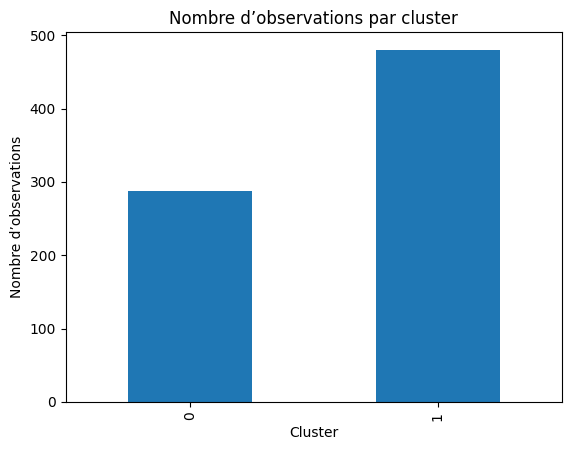

In [9]:
data['Cluster'].value_counts().sort_index().plot(kind='bar')
plt.title('Nombre d’observations par cluster')
plt.xlabel('Cluster')
plt.ylabel('Nombre d’observations')
plt.show()

<br>

#### **5. Interprétation des Profils de Clusters :**

##### **5.1. Analyse du Graphique PCA 2D :**

- Les points sont bien séparés :

    - Les points bleus (``Cluster 0``) occupent surtout la partie droite du graphe.

    - Les points oranges (``Cluster 1``) sont concentrés à gauche.

- La séparation n’est pas parfaitement linéaire, mais on distingue clairement deux groupes distincts, donc K-Means a bien réussi à identifier une structure dans les données.


##### **5.2. Analyse du Bar Chart :**

- Le ``Cluster 0`` contient environ ``290`` individus.

- Le ``Cluster 1`` contient environ ``480`` individus.

- Cela montre une répartition déséquilibrée : le second cluster regroupe plus d’observations.

- Ce déséquilibre indique que les individus de ton dataset se répartissent principalement dans deux groupes distincts, mais pas en proportions égales. Cela peut signifier que :

    - Le ``Cluster 1`` représente une population plus homogène et dominante (ex. : individus “sains” si c’est un dataset de santé).

    - Le ``Cluster 0`` représente un groupe plus restreint mais potentiellement plus atypique ou “à risque”.





##### **5.3. Interprétation :**

- La réduction PCA montre que les deux clusters ont des caractéristiques visiblement différentes sur les composantes principales.

- Cela confirme que K-Means avec k = 2 est pertinent, car la séparation est nette.

- Il est probable que les variables principales expliquant cette séparation soient :

    - ``Glucose``, ``Insulin``, ``BMI``, ``Age`` (car ce sont souvent les variables dominantes dans les jeux de données liés au diabète).

- Interprétation probable (hypothèse) :

    - ``Cluster 0`` : Patients avec **risque plus élevé** de diabète.

    - ``Cluster 1`` : Patients avec valeurs normales, donc **faible risque**.